# Python Panda  
Download from: https://github.com/davidvi/pypanda

In [9]:
from pypanda import panda
from pypanda import lioness

import numpy as np
import pandas as pd

import time
import matplotlib.pyplot as plt
from lightning import Lightning

%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##### Run panda

In [2]:
expression = '../ToyData/ToyExpressionData.txt'
motif = '../ToyData/ToyMotifData.txt'
ppi = '../ToyData/ToyPPIData.txt'

Run and time python panda 

In [8]:
python_panda_time = time.time()

p = panda(expression, motif, ppi, remove_missing=False)

total_python_panda_time = time.time() - python_panda_time
print('total running time: %s seconds' % (total_python_panda_time))

running panda took: 5.41045403481 seconds
total running time: 5.76216316223 seconds


Run and time R panda

In [5]:
%%R -i expression -i motif -i ppi -o r_panda_results -o total_r_panda_time
library(pandaR)
ptm <- proc.time()
mot <- read.table(file = motif, header = FALSE)
expr <- read.table(file = expression, header = FALSE, row.names = 1)
prot <- read.table(file = ppi, header = FALSE)
p = panda(motif = mot, expr = expr, ppi = prot, remove.missing.ppi = TRUE, remove.missing.motif = TRUE, remove.missing.genes = TRUE)
print(proc.time() - ptm)
r_panda_results <- p@regNet
t <- proc.time() - ptm
total_r_panda_time <- t[3]

   user  system elapsed 
 17.237   1.495  19.775 


Run and time c panda

In [6]:
c_panda_time = time.time()

! ~/Tools/panda_c/PANDA_v2 -e '../ToyData/ToyExpressionData.txt' -m '../ToyData/ToyMotifData.txt' -p '../ToyData/ToyPPIData.txt'

c_total_panda_time = time.time() - c_panda_time
print('total running time: %s seconds' % (c_total_panda_time))

Reading in data.  Note that the code only allocates space for up to 1000 Regulators, 20000 Target Genes, and 500 expression conditions.  If you have more than this you may need to alter the code to avoid a segfault.
Reading In Expression Data!
Num Unique Genes in Expression File:1000 (1000 total entries).
Reading in Motif Data!
Running PANDA using the following parameters:
alpha=0.100000
Data-Types Being Used include:
Regulation Data
Protein Interaction Data
Expression Data
Reading in Protein Interation Data!

Network Data Stats:
NumRegulators:87, NumGenes:1000, NumConditions:50 (50 used for Network), NumRegulatoryInteractions:14597 (14597 unique)

Learning Network!
Step#0, hamming=0.718965
Step#1, hamming=0.389925
Step#2, hamming=0.402366
Step#3, hamming=0.400519
Step#4, hamming=0.389038
Step#5, hamming=0.370510
Step#6, hamming=0.346812
Step#7, hamming=0.319722
Step#8, hamming=0.290806
Step#9, hamming=0.261407
Step#10, hamming=0.232567
Step#11, hamming=0.205049
Step#12, hamming=0.1793

Run and time matlab panda

In [7]:
matlab_panda_time = time.time()

! /Applications/MATLAB_R2015b.app/bin/matlab -nojvm -nodisplay -nosplash -r RunPANDA

total_panda_matlab_time = time.time() - matlab_panda_time
print('total running time: %s seconds' % (total_panda_matlab_time))

=
                            < M A T L A B (R) >
                  Copyright 1984-2015 The MathWorks, Inc.
                   R2015b (8.6.0.267246) 64-bit (maci64)
                              August 20, 2015

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.

Reading in data!
Normalizing Networks!
Learning Network!
Running PANDA on 1000 Genes and 87 TFs took 3.513763 seconds!
Elapsed time is 3.558499 seconds.
>total running time: 8.12574291229 seconds


##### Run lioness

Run and time python lioness

In [4]:
python_lioness_time = time.time()

l = lioness(p)

total_lioness_panda_time = time.time() - python_lioness_time
print('total running time: %s seconds' % (total_lioness_panda_time))

running panda took: 5.40186715126 seconds
running panda took: 5.4144589901 seconds
running panda took: 5.43185687065 seconds
running panda took: 5.46617102623 seconds
running panda took: 5.45085096359 seconds
running panda took: 5.46951198578 seconds
running panda took: 5.47449803352 seconds
running panda took: 5.41802406311 seconds
running panda took: 5.48645401001 seconds
running panda took: 5.47578907013 seconds
running panda took: 5.45873594284 seconds
running panda took: 5.4064707756 seconds
running panda took: 5.36641001701 seconds
running panda took: 5.38865494728 seconds
running panda took: 5.44336509705 seconds
running panda took: 5.4565448761 seconds
running panda took: 5.37578606606 seconds
running panda took: 5.38322401047 seconds
running panda took: 5.37964105606 seconds
running panda took: 5.36775398254 seconds
running panda took: 5.38002586365 seconds
running panda took: 5.37032604218 seconds
running panda took: 5.34932994843 seconds
running panda took: 5.36512303352 sec

In [5]:
l.save_lioness_results(file = 'toy_Lioness.txt')

Run and time matlab lioness

In [6]:
matlab_lioness_time = time.time()

! /Applications/MATLAB_R2015b.app/bin/matlab -nojvm -nodisplay -nosplash -r RunLIONESS

total_lioness_matlab_time = time.time() - matlab_lioness_time
print('total running time: %s seconds' % (total_lioness_matlab_time))

=
                            < M A T L A B (R) >
                  Copyright 1984-2015 The MathWorks, Inc.
                   R2015b (8.6.0.267246) 64-bit (maci64)
                              August 20, 2015

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.

Reading in data!
Running PANDA on 1000 Genes and 87 TFs took 1.514647 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.479963 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.493818 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.483701 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.498209 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.480223 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.475845 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.483885 seconds!
Running PANDA on 1

##### Summary runtimes


panda

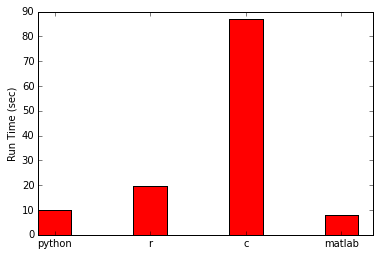

In [14]:
panda_run_times = (total_python_panda_time, total_r_panda_time[0], c_total_panda_time, total_panda_matlab_time)
panda_labels = ('python', 'r', 'c', 'matlab')
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, panda_run_times, width, color='r')
ax.set_ylabel('Run Time (sec)')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(panda_labels)
plt.show()

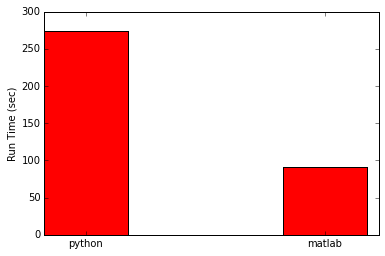

In [7]:
lioness_run_times = (total_lioness_panda_time, total_lioness_matlab_time)
lioness_labels = ('python', 'matlab')
ind = np.arange(2)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, lioness_run_times, width, color='r')
ax.set_ylabel('Run Time (sec)')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(lioness_labels)
plt.show()

##### Features

In [12]:
panda_indegree = p.return_panda_indegree()
panda_indegree.head()

,force
gene,
41157,1.139713
AACSL,-5.090725
AAK1,-10.923515
ABCA17P,-8.919393
ABCB8,9.091765


In [13]:
panda_outdegree = p.return_panda_outdegree()
panda_outdegree.head()

,force
tf,
AHR,1030.068405
AR,-731.315760
ARID3A,1274.524235
ARNT,1590.039789
BRCA1,833.289410
